

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [1]:
from IPython.display import IFrame
doc_url = "https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1"
IFrame(src=doc_url, width=1200, height=600)


## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

In [2]:
import pandas as pd

In [3]:
datapath = "C:/Users/marni/Documents/MADE/Data 1/lab-01/Wikileaks Afghanistan war logs analysis.xlsx"
data = pd.read_excel(datapath, sheet_name="TOTAL CASUALTIES, ALL CAUSES", skiprows=1, skipfooter=1)
data.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004,January,15.0,51,23.0,NaN,11
1,2004,February,NaN,7,4.0,5.0,2
2,2004,March,19.0,2,NaN,2.0,3
3,2004,April,5.0,3,19.0,NaN,3
4,2004,May,18.0,29,56.0,6.0,9


In [4]:
rowdictionary = {}
for column in data.columns:
    rowdictionary[column] = data.loc[data.index[0], column]
rowdictionary

{'Year': 2004,
 'Month': 'January',
 'Taliban': 15.0,
 'Civilians': 51,
 'Afghan forces': 23.0,
 'Nato (detailed in spreadsheet)': nan,
 'Nato - official figures': 11}

## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

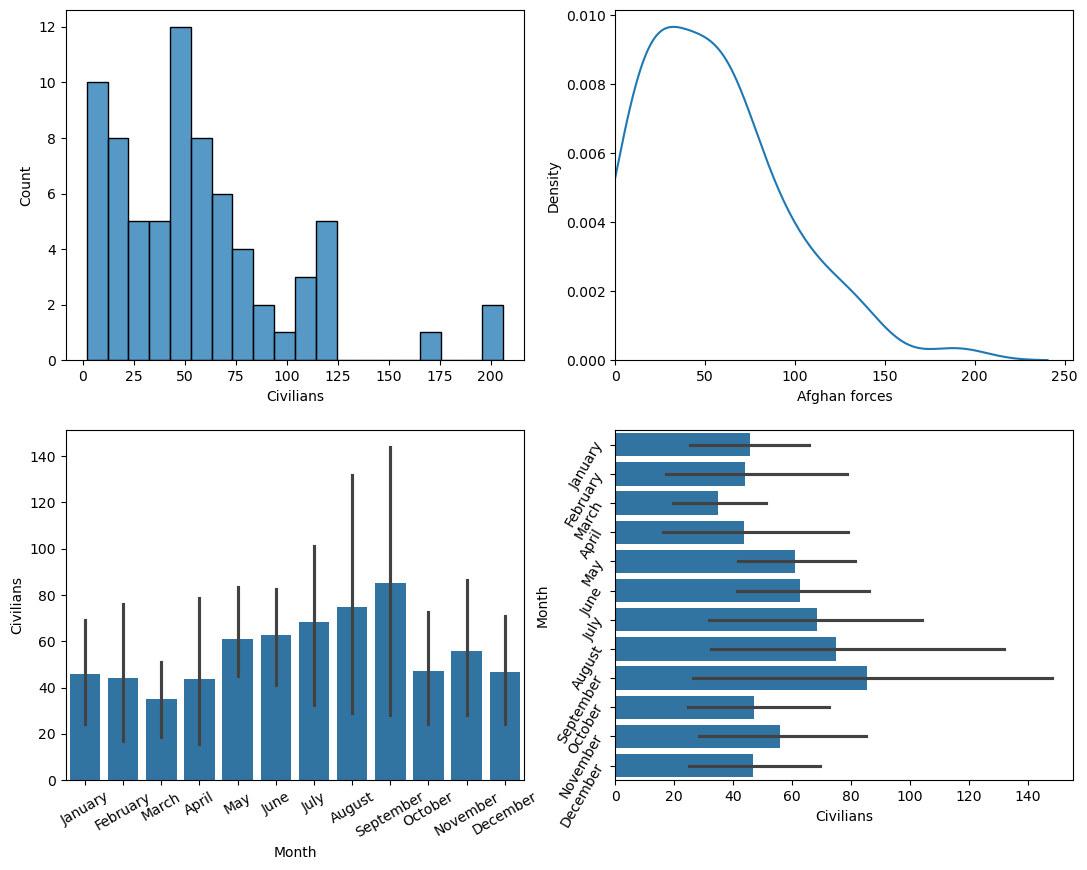

In [6]:

fig, axes = plt.subplots(2, 2, figsize=(13, 10))
sns.histplot(data, x="Civilians", binwidth=10, ax=axes[0,0])
sns.kdeplot(data, x="Afghan forces", ax=axes[0,1]).set(xlim=0)
sns.barplot(data, x="Month", y="Civilians", ax=axes[1,0]).tick_params(axis='x', rotation=30)
sns.barplot(data, y="Month", x="Civilians", ax=axes[1,1]).tick_params(axis='y', rotation=60)

## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [7]:
column = "Civilians"
for i in range(len(data)):
    print(data.loc[i, column])

51
7
2
3
29
32
19
26
4
14
19
13
4
4
18
5
49
31
5
6
12
15
13
16
93
54
37
33
54
71
64
101
172
44
46
51
53
33
48
123
71
80
83
65
64
46
60
37
43
120
41
55
54
51
120
46
63
56
78
76
31
46
64
44
109
111
119
206
197
107
120
87


In [8]:
threshold = 100
df_rows = pd.DataFrame()
for i in range(len(data)):
    if data.loc[i, column] > threshold:
        df_rows = pd.concat([df_rows, data.iloc[i]], axis=1)
df_rows.T

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
31,2006,August,161.0,101,42.0,18.0,29
32,2006,September,945.0,172,97.0,19.0,38
39,2007,April,166.0,123,68.0,26.0,20
49,2008,February,139.0,120,35.0,7.0,7
54,2008,July,303.0,120,100.0,19.0,30
64,2009,May,406.0,109,118.0,22.0,27
65,2009,June,526.0,111,133.0,32.0,38
66,2009,July,557.0,119,80.0,90.0,76
67,2009,August,445.0,206,190.0,64.0,77
68,2009,September,614.0,197,133.0,54.0,70


In [9]:
df_rows_short = data[data["Civilians"] > threshold]
df_rows_short

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
31,2006,August,161.0,101,42.0,18.0,29
32,2006,September,945.0,172,97.0,19.0,38
39,2007,April,166.0,123,68.0,26.0,20
49,2008,February,139.0,120,35.0,7.0,7
54,2008,July,303.0,120,100.0,19.0,30
64,2009,May,406.0,109,118.0,22.0,27
65,2009,June,526.0,111,133.0,32.0,38
66,2009,July,557.0,119,80.0,90.0,76
67,2009,August,445.0,206,190.0,64.0,77
68,2009,September,614.0,197,133.0,54.0,70


## Question 5
a) Crate a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


In [10]:
list = ["Civilians", "Afghan forces"]

In [11]:
colselection = data.copy()
colselection['Year Month'] = data["Year"].astype(str) + ' ' + data["Month"]
colselection = colselection.set_index("Year Month")
colselection = colselection[list]
colselection

,Civilians,Afghan forces
Year Month,,
2004 January,51,23.0
2004 February,7,4.0
2004 March,2,NaN
2004 April,3,19.0
2004 May,29,56.0
...,...,...
2009 August,206,190.0
2009 September,197,133.0
2009 October,107,86.0


In [12]:
colselection = colselection.fillna(0)
colselection["total"] = colselection["Civilians"] + colselection["Afghan forces"]
colselection

,Civilians,Afghan forces,total
Year Month,,,
2004 January,51,23.0,74.0
2004 February,7,4.0,11.0
2004 March,2,0.0,2.0
2004 April,3,19.0,22.0
2004 May,29,56.0,85.0
...,...,...,...
2009 August,206,190.0,396.0
2009 September,197,133.0,330.0
2009 October,107,86.0,193.0


<Axes: xlabel='Year Month', ylabel='total'>

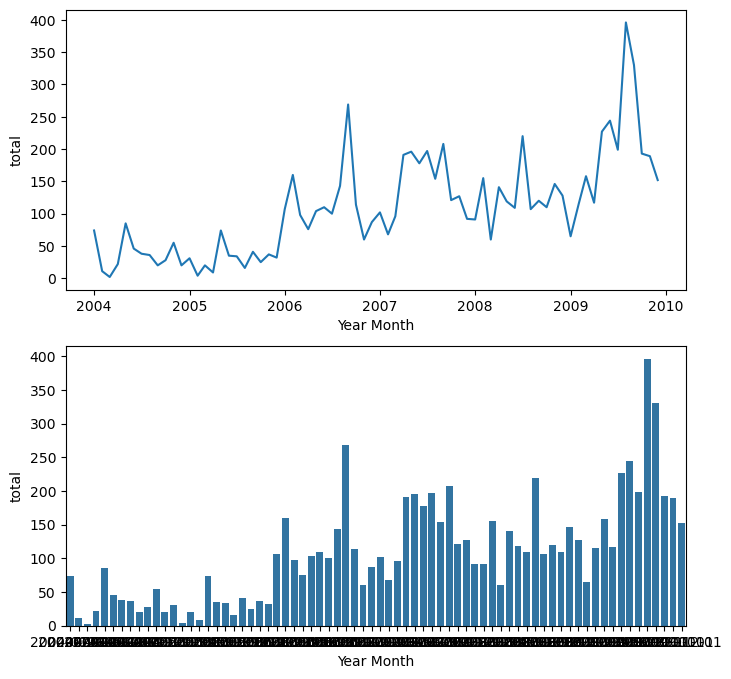

In [16]:
colselection.index  = pd.to_datetime(colselection.index, format="%Y %B") 

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
sns.lineplot(colselection.total, ax=axes[0])
sns.barplot(colselection.total, ax=axes[1])


In [14]:
plt.bar(colselection)

TypeError: bar() missing 1 required positional argument: 'height'